# Лабораторная работа "Определение перспективности малых и средних строительных предприятий в России"

## Необходимые библиотеки

In [1]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


## Внос частично очищенных данных из файла с помощью pandas. Дальнее очищение.

In [2]:
import pandas as pd
import numpy as np
import requests

In [7]:
df = pd.read_excel("Filtered Register.xlsx")
df

,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Основной вид деятельности,Регион,Район,Город,Населенный пункт,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год
0,20,"""КОРПОРАЦИЯ ВИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...",Малое предприятие,1025004907080,5038038838,41.20 Строительство жилых и нежилых зданий,50 - Московская область,Пушкино г,NaN,NaN,2016-01-08,Нет,Нет,Нет,36.0
1,25,"""ЛАВИНА"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ",Малое предприятие,1035010952624,5027064258,41.2 Строительство жилых и нежилых зданий,50 - Московская область,NaN,г Люберцы,NaN,2016-01-08,Нет,Нет,Нет,40.0
2,52,"""ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...",Среднее предприятие,1025007270551,5027006369,41.20 Строительство жилых и нежилых зданий,50 - Московская область,NaN,г Дзержинский,NaN,2016-01-08,Да,Нет,Нет,201.0
3,4651,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""2МЕН ГРУПП ДЕВЕЛОПМЕНТ""",Малое предприятие,1067746424899,7701651356,41.2 Строительство жилых и нежилых зданий,72 - Тюменская область,NaN,г Тюмень,NaN,2017-10-08,Да,Нет,Нет,19.0
4,4653,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""777""",Малое предприятие,1021400692048,1414006922,41.20 Строительство жилых и нежилых зданий,77 - г.Москва,NaN,NaN,NaN,2017-10-08,Да,Нет,Нет,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568,560903,СОВМЕСТНОЕ ПРЕДПРИЯТИЕ ОБЩЕСТВО С ОГРАНИЧЕННОЙ...,Среднее предприятие,1026500785673,6504043928,41.20 Строительство жилых и нежилых зданий,65 - Сахалинская область,Корсаковский р-н,г Корсаков,NaN,2016-01-08,Да,Нет,Нет,145.0
10569,565172,СТРОИТЕЛЬНО-ИНВЕСТИЦИОННАЯ КОМПАНИЯ ОБЩЕСТВО С...,Малое предприятие,1032307179409,2312105041,41.2 Строительство жилых и нежилых зданий,23 - Краснодарский край,NaN,г Краснодар,NaN,2017-10-08,Нет,Нет,Нет,16.0
10570,576233,"УПРАВЛЕНИЕ МЕХАНИЗИРОВАННЫХ РАБОТ "" КАСКАД "" (...",Малое предприятие,1022300509637,2301032458,41.2 Строительство жилых и нежилых зданий,23 - Краснодарский край,Анапский р-н,NaN,с Сукко,2017-10-08,Нет,Нет,Нет,24.0
10571,580133,"ФИРМА ""ТЕПЛОСТРОЙПРОЕКТ-С"" ОБЩЕСТВО С ОГРАНИЧЕ...",Малое предприятие,1032000400233,2002001476,41.20 Строительство жилых и нежилых зданий,20 - Чеченская Республика,Ачхой-Мартановский р-н,NaN,с Валерик,2016-01-08,Да,Нет,Нет,67.0


In [8]:
df.count()

№ п/п                                                                       10573
Наименование / ФИО                                                          10573
Категория                                                                   10573
ОГРН                                                                        10573
ИНН                                                                         10573
Основной вид деятельности                                                   10573
Регион                                                                      10573
Район                                                                        1288
Город                                                                        6810
Населенный пункт                                                              815
Дата включения в реестр                                                     10573
Наличие лицензий                                                            10573
Наличие заключен

### Удаление столбцов с большим количеством неизвестных значений

In [9]:
df.pop("Район")
df.pop("Населенный пункт")
df

,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Основной вид деятельности,Регион,Город,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год
0,20,"""КОРПОРАЦИЯ ВИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...",Малое предприятие,1025004907080,5038038838,41.20 Строительство жилых и нежилых зданий,50 - Московская область,NaN,2016-01-08,Нет,Нет,Нет,36.0
1,25,"""ЛАВИНА"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ",Малое предприятие,1035010952624,5027064258,41.2 Строительство жилых и нежилых зданий,50 - Московская область,г Люберцы,2016-01-08,Нет,Нет,Нет,40.0
2,52,"""ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...",Среднее предприятие,1025007270551,5027006369,41.20 Строительство жилых и нежилых зданий,50 - Московская область,г Дзержинский,2016-01-08,Да,Нет,Нет,201.0
3,4651,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""2МЕН ГРУПП ДЕВЕЛОПМЕНТ""",Малое предприятие,1067746424899,7701651356,41.2 Строительство жилых и нежилых зданий,72 - Тюменская область,г Тюмень,2017-10-08,Да,Нет,Нет,19.0
4,4653,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""777""",Малое предприятие,1021400692048,1414006922,41.20 Строительство жилых и нежилых зданий,77 - г.Москва,NaN,2017-10-08,Да,Нет,Нет,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568,560903,СОВМЕСТНОЕ ПРЕДПРИЯТИЕ ОБЩЕСТВО С ОГРАНИЧЕННОЙ...,Среднее предприятие,1026500785673,6504043928,41.20 Строительство жилых и нежилых зданий,65 - Сахалинская область,г Корсаков,2016-01-08,Да,Нет,Нет,145.0
10569,565172,СТРОИТЕЛЬНО-ИНВЕСТИЦИОННАЯ КОМПАНИЯ ОБЩЕСТВО С...,Малое предприятие,1032307179409,2312105041,41.2 Строительство жилых и нежилых зданий,23 - Краснодарский край,г Краснодар,2017-10-08,Нет,Нет,Нет,16.0
10570,576233,"УПРАВЛЕНИЕ МЕХАНИЗИРОВАННЫХ РАБОТ "" КАСКАД "" (...",Малое предприятие,1022300509637,2301032458,41.2 Строительство жилых и нежилых зданий,23 - Краснодарский край,NaN,2017-10-08,Нет,Нет,Нет,24.0
10571,580133,"ФИРМА ""ТЕПЛОСТРОЙПРОЕКТ-С"" ОБЩЕСТВО С ОГРАНИЧЕ...",Малое предприятие,1032000400233,2002001476,41.20 Строительство жилых и нежилых зданий,20 - Чеченская Республика,NaN,2016-01-08,Да,Нет,Нет,67.0


### Удаление столбца с одинаковыми значениями на протяжений всей таблицы

В условии задачи указано, что надо рассматривать только те предприятия, основным видом деятельности которых является строительство жилых и нежилых зданий. Следует, что у этого столбца нет информатиции, поскольку уже известно его значение.
Скорее всего можно удалить и другие колонки, как наличие контрактов и производство инновационной продукции, но они пока останутся, до лучшего ознакомления с данными.

In [10]:
df = df[df["Основной вид деятельности"] == '41.20 Строительство жилых и нежилых зданий']
df.pop("Основной вид деятельности")
df

,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Регион,Город,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год
0,20,"""КОРПОРАЦИЯ ВИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...",Малое предприятие,1025004907080,5038038838,50 - Московская область,NaN,2016-01-08,Нет,Нет,Нет,36.0
2,52,"""ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...",Среднее предприятие,1025007270551,5027006369,50 - Московская область,г Дзержинский,2016-01-08,Да,Нет,Нет,201.0
4,4653,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""777""",Малое предприятие,1021400692048,1414006922,77 - г.Москва,NaN,2017-10-08,Да,Нет,Нет,35.0
5,4668,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АГРОТЕХИМПОРТ""",Малое предприятие,1043301806415,3327332190,33 - Владимирская область,г Владимир,2022-10-08,Да,Нет,Нет,52.0
6,4674,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АКС""",Малое предприятие,1027807999988,7816061297,78 - г.Санкт-Петербург,NaN,2022-10-06,Да,Нет,Нет,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10566,560512,"СМУ ""МОНОЛИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТ...",Малое предприятие,1162301050515,2301091157,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,4.0
10567,560513,"СМУ ""РУСЬ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕН...",Малое предприятие,1132301002900,2301083597,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,74.0
10568,560903,СОВМЕСТНОЕ ПРЕДПРИЯТИЕ ОБЩЕСТВО С ОГРАНИЧЕННОЙ...,Среднее предприятие,1026500785673,6504043928,65 - Сахалинская область,г Корсаков,2016-01-08,Да,Нет,Нет,145.0
10571,580133,"ФИРМА ""ТЕПЛОСТРОЙПРОЕКТ-С"" ОБЩЕСТВО С ОГРАНИЧЕ...",Малое предприятие,1032000400233,2002001476,20 - Чеченская Республика,NaN,2016-01-08,Да,Нет,Нет,67.0


## Определение недостающих данных

Для предстоящего анализа надо получить данные с сайта, который приложен в файле sites.
Отправляя один запрос, получаем, что первый набор информации можно найти с помощью следующего запроса: 
https://bo.nalog.ru/advanced-search/organizations/search?query=5038038838
Где приводится ИНН как идентификатор предприятия. Предложенным способом получения информации с данного сайта получается словарь, как представленный ниже. Из него можно получить краткую информацию, вроде чистой прибыли за последних пять лет. Этого не будет достаточно.
Исследуя дальше, получается, что в данном словаре есть поле ид. 
С его помощью можно отправить запрос получше: https://bo.nalog.ru/nbo/organizations/5872486
В таком запросе получается гораздо больше информации, включая геоданные: долготу и широту. Они нам понадобятся для помещения предприятий на маппу. Есть еще более важный набор информации, доступный по ссылке https://bo.nalog.ru/nbo/organizations/5872486/bfo/.
Тут видно огромное количество данных, а надо выбрать только те, в которых мы нуждаемся.
Для вычисления ЕБИТДА буду пользоваться следующей формулой: Вр - СТ + НП + Пр + А
Вр это выручка, ее код 2110.
СТ это себестоимость, ее код 2120.
НП, налог на прибыль, код 2410.
Пр, проценты по займам. В балансе для этого есть два значения: 1170 и 1240. Пока не понятно, для чего они.
А, это амортизация. Она относится как к амортизации основных средств, так и к амортизации нематериальных активов.
Амортизация основных средств: 1150. Для этого будет нужно значение из предыдущего и из текущего года. Вычитая их друг из друга, мы получим нужное нам значение амортизации основных средств.
Амортизация основных средств находится на строке 2210 (коммерческие расходы) и на строке 2350 прочие расходы.
Все берем в модулях.
2110 - 2120 + 2410 + (1240) + |curr1150-prev1150| + 2210 + 2350


In [9]:
my_dict = {
  "content": [
    {
      "id": 7005901,
      "inn": "<strong>6504043928</strong>",
      "shortName": "СП ООО \"ВАККОР\"",
      "ogrn": "1026500785673",
      "index": "694020",
      "region": "САХАЛИНСКАЯ",
      "district": "КОРСАКОВСКИЙ",
      "city": "КОРСАКОВ",
      "settlement": None,
      "street": "ФЛОТСКАЯ",
      "house": "72 А",
      "building": None,
      "office": None,
      "okved2": "41.20",
      "okopf": 12300,
      "okato": None,
      "okpo": None,
      "okfs": None,
      "statusCode": "LIQUIDATION_STAGE",
      "statusDate": "2024-04-21",
      "bfo": [
        {
          "period": "2020",
          "actualBfoDate": None,
          "gainSum": 190428,
          "knd": "0710099",
          "hasAz": False,
          "hasKs": False,
          "actualCorrectionNumber": 1,
          "actualCorrectionDate": "2021-04-05",
          "isCb": False
        },
        {
          "period": "2019",
          "actualBfoDate": None,
          "gainSum": 552460,
          "knd": "0710099",
          "hasAz": False,
          "hasKs": False,
          "actualCorrectionNumber": 3,
          "actualCorrectionDate": "2020-07-16",
          "isCb": False
        },
        {
          "period": "2022",
          "actualBfoDate": "2023-03-31",
          "gainSum": 927838,
          "knd": "0710099",
          "hasAz": False,
          "hasKs": False,
          "actualCorrectionNumber": 0,
          "actualCorrectionDate": "2023-03-31",
          "isCb": False
        },
        {
          "period": "2021",
          "actualBfoDate": "2022-06-07",
          "gainSum": 988266,
          "knd": "0710099",
          "hasAz": False,
          "hasKs": False,
          "actualCorrectionNumber": 2,
          "actualCorrectionDate": "2022-06-07",
          "isCb": False
        },
        {
          "period": "2023",
          "actualBfoDate": "2024-04-01",
          "gainSum": 326663,
          "knd": "0710099",
          "hasAz": False,
          "hasKs": False,
          "actualCorrectionNumber": 0,
          "actualCorrectionDate": "2024-04-01",
          "isCb": False
        }
      ]
    }
  ],
  "pageable": {
    "sort": {
      "unsorted": True,
      "sorted": False,
      "empty": True
    },
    "pageSize": 20,
    "pageNumber": 0,
    "offset": 0,
    "unpaged": False,
    "paged": True
  },
  "last": True,
  "totalPages": 1,
  "totalElements": 1,
  "first": True,
  "numberOfElements": 1,
  "sort": {
    "unsorted": True,
    "sorted": False,
    "empty": True
  },
  "size": 20,
  "number": 0,
  "empty": False
}
my_dict['content']


[{'id': 7005901,
  'inn': '<strong>6504043928</strong>',
  'shortName': 'СП ООО "ВАККОР"',
  'ogrn': '1026500785673',
  'index': '694020',
  'region': 'САХАЛИНСКАЯ',
  'district': 'КОРСАКОВСКИЙ',
  'city': 'КОРСАКОВ',
  'settlement': None,
  'street': 'ФЛОТСКАЯ',
  'house': '72 А',
  'building': None,
  'office': None,
  'okved2': '41.20',
  'okopf': 12300,
  'okato': None,
  'okpo': None,
  'okfs': None,
  'statusCode': 'LIQUIDATION_STAGE',
  'statusDate': '2024-04-21',
  'bfo': [{'period': '2020',
    'actualBfoDate': None,
    'gainSum': 190428,
    'knd': '0710099',
    'hasAz': False,
    'hasKs': False,
    'actualCorrectionNumber': 1,
    'actualCorrectionDate': '2021-04-05',
    'isCb': False},
   {'period': '2019',
    'actualBfoDate': None,
    'gainSum': 552460,
    'knd': '0710099',
    'hasAz': False,
    'hasKs': False,
    'actualCorrectionNumber': 3,
    'actualCorrectionDate': '2020-07-16',
    'isCb': False},
   {'period': '2022',
    'actualBfoDate': '2023-03-31',
  

Сначала добавляю столбцы с неизвестными значениями, а потом буду изменять значения. Таким способом будет видно, после получения информации, каково ее качество.

In [14]:
from requests.exceptions import ConnectionError
import time
import random
count = 0
session = requests.Session()
user_agents = ['Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:129.0) Gecko/20100101 Firefox/129.0']
user_agent = user_agents[random.randint(0,1)]
arr = df['ИНН'].values
for inn_found in arr:
    try:
        if int(inn_found) == 7825012056 or int(inn_found) == 9701016076:
            continue
        if count and count % 100 == 0:
            print(count)
        res = session.get(f"https://bo.nalog.ru/advanced-search/organizations/search?query={int(inn_found)}", headers = {"User-Agent": user_agent, "Connection": "keep-alive"}).json()
        count += 1
        if 'content' not in res or len(res['content']) == 0 or 'id' not in res['content'][0]:
            print(f"No data for {inn_found}")
            continue
        df.loc[df['ИНН'] == inn_found, 'id'] = res['content'][0]['id']
    except ConnectionError as e:
        print(f"Exception thrown after {count}")
        time.sleep(random.randint(2,6))
        session = requests.Session()
        user_agent = user_agents[random.randint(0,1)]
        
print('DONE')


No data for 5009106346
100
Exception thrown after 114
Exception thrown after 114
Exception thrown after 114
Exception thrown after 192
200
300
400
Exception thrown after 415
Exception thrown after 415
Exception thrown after 415
Exception thrown after 415
No data for 5032261607
No data for 9703026866
No data for 9704117273
500
600
No data for 7720866131
Exception thrown after 698
Exception thrown after 698
700
Exception thrown after 782
800
900
Exception thrown after 939
Exception thrown after 939
1000
No data for 7716964217
1100
No data for 9705166442
Exception thrown after 1149
No data for 9722028851
No data for 9721115773
1200
No data for 4101094997
No data for 9721158304
1300
Exception thrown after 1304
Exception thrown after 1304
Exception thrown after 1304
Exception thrown after 1304
Exception thrown after 1304
Exception thrown after 1304
Exception thrown after 1304
Exception thrown after 1304
Exception thrown after 1304
Exception thrown after 1304
Exception thrown after 1304
Exce

In [12]:
#for i in range(2019, 2024):
 #   df[f'gainSum{i}'] = pd.NA
df['id'] = pd.NA
df

/var/folders/14/xxrhyty13vz4s7s720_xv03h0000gr/T/ipykernel_54772/2418337978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = pd.NA


,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Регион,Город,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год,id
0,20,"""КОРПОРАЦИЯ ВИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...",Малое предприятие,1025004907080,5038038838,50 - Московская область,NaN,2016-01-08,Нет,Нет,Нет,36.0,<NA>
2,52,"""ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...",Среднее предприятие,1025007270551,5027006369,50 - Московская область,г Дзержинский,2016-01-08,Да,Нет,Нет,201.0,<NA>
4,4653,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""777""",Малое предприятие,1021400692048,1414006922,77 - г.Москва,NaN,2017-10-08,Да,Нет,Нет,35.0,<NA>
5,4668,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АГРОТЕХИМПОРТ""",Малое предприятие,1043301806415,3327332190,33 - Владимирская область,г Владимир,2022-10-08,Да,Нет,Нет,52.0,<NA>
6,4674,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АКС""",Малое предприятие,1027807999988,7816061297,78 - г.Санкт-Петербург,NaN,2022-10-06,Да,Нет,Нет,21.0,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10566,560512,"СМУ ""МОНОЛИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТ...",Малое предприятие,1162301050515,2301091157,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,4.0,<NA>
10567,560513,"СМУ ""РУСЬ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕН...",Малое предприятие,1132301002900,2301083597,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,74.0,<NA>
10568,560903,СОВМЕСТНОЕ ПРЕДПРИЯТИЕ ОБЩЕСТВО С ОГРАНИЧЕННОЙ...,Среднее предприятие,1026500785673,6504043928,65 - Сахалинская область,г Корсаков,2016-01-08,Да,Нет,Нет,145.0,<NA>
10571,580133,"ФИРМА ""ТЕПЛОСТРОЙПРОЕКТ-С"" ОБЩЕСТВО С ОГРАНИЧЕ...",Малое предприятие,1032000400233,2002001476,20 - Чеченская Республика,NaN,2016-01-08,Да,Нет,Нет,67.0,<NA>


In [107]:
import time
import random
count = 0
session = requests.Session()
user_agents = ["Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:109.0) Gecko/20100101 Firefox/111.0", "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"]
user_agent = user_agents[1]
arr = df['ИНН'].values
for inn_found in arr:
    if int(inn_found) == 7825012056 or int(inn_found) == 9701016076:
        continue
    if count % 20 == 0:
        user_agent = user_agents[random.randint(0,1)]
        print("Got to",count)
    if count and count % 100 == 0:
        time.sleep(random.randint(2,4))
        session = requests.Session()
    res = session.get(f"https://bo.nalog.ru/advanced-search/organizations/search?query={int(inn_found)}", headers = {"User-Agent": user_agent, "Connection": "keep-alive"}).json()
    count += 1
    if 'content' not in res or len(res['content']) == 0 or 'bfo' not in res['content'][0]:
        print(f"No data for {inn_found}")
        continue
    periods = res['content'][0]['bfo']
    for period in periods:
        if int(period['period']) not in range(2019, 2024):
            print(f"{period} data for {inn_found} not used")
            continue
        df.loc[df['ИНН'] == inn_found, f'gainSum{int(period['period'])}'] = period['gainSum']


Got to 0
Got to 20
Got to 40
Got to 60
Got to 80
Got to 100
Got to 120
Got to 140
No data for 8904076738
Got to 160
Got to 180
Got to 200
Got to 220
No data for 278140402
Got to 240
No data for 6313000240
Got to 260
Got to 280
Got to 300
Got to 320
Got to 340
Got to 360
Got to 380
Got to 400
Got to 420
Got to 440
Got to 460
Got to 480
Got to 500
Got to 520
Got to 540
Got to 560
Got to 580
Got to 600
Got to 620
Got to 640
Got to 660
Got to 680
Got to 700
Got to 720
Got to 740
Got to 760
Got to 780
Got to 800
Got to 820
Got to 840
Got to 860
No data for 7702376423
Got to 880
Got to 900
Got to 920
No data for 9724149604
Got to 940
Got to 960


Для того, чтобы запросы работали, было нужно гораздо больше, чем однажды, запускать программу. 

Теперь можно очистить новополученные данные. Есть строки, в которых не получились значения.

№ п/п                                                                       8927
Наименование / ФИО                                                          8927
Категория                                                                   8927
ОГРН                                                                        8927
ИНН                                                                         8927
Регион                                                                      8927
Город                                                                       5730
Дата включения в реестр                                                     8927
Наличие лицензий                                                            8927
Наличие заключенных договоров, контрактов                                   8927
Производство инновационной, высокотехнологичной продукции                   8927
Среднесписочная численность работников за предшествующий календарный год    8881
id                          

In [19]:
df.to_csv('table_id.csv', index = False)

In [23]:
df1 = df[df['id'].notnull()]
df1

,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Регион,Город,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год,id
0,20,"""КОРПОРАЦИЯ ВИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...",Малое предприятие,1025004907080,5038038838,50 - Московская область,NaN,2016-01-08,Нет,Нет,Нет,36.0,5872486
2,52,"""ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...",Среднее предприятие,1025007270551,5027006369,50 - Московская область,г Дзержинский,2016-01-08,Да,Нет,Нет,201.0,6900709
4,4653,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""777""",Малое предприятие,1021400692048,1414006922,77 - г.Москва,NaN,2017-10-08,Да,Нет,Нет,35.0,4980670
5,4668,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АГРОТЕХИМПОРТ""",Малое предприятие,1043301806415,3327332190,33 - Владимирская область,г Владимир,2022-10-08,Да,Нет,Нет,52.0,3867230
6,4674,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АКС""",Малое предприятие,1027807999988,7816061297,78 - г.Санкт-Петербург,NaN,2022-10-06,Да,Нет,Нет,21.0,7041303
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10566,560512,"СМУ ""МОНОЛИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТ...",Малое предприятие,1162301050515,2301091157,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,4.0,9652105
10567,560513,"СМУ ""РУСЬ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕН...",Малое предприятие,1132301002900,2301083597,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,74.0,8043846
10568,560903,СОВМЕСТНОЕ ПРЕДПРИЯТИЕ ОБЩЕСТВО С ОГРАНИЧЕННОЙ...,Среднее предприятие,1026500785673,6504043928,65 - Сахалинская область,г Корсаков,2016-01-08,Да,Нет,Нет,145.0,7005901
10571,580133,"ФИРМА ""ТЕПЛОСТРОЙПРОЕКТ-С"" ОБЩЕСТВО С ОГРАНИЧЕ...",Малое предприятие,1032000400233,2002001476,20 - Чеченская Республика,NaN,2016-01-08,Да,Нет,Нет,67.0,2927552


In [28]:
df1

,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Регион,Город,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год,id
0,20,"""КОРПОРАЦИЯ ВИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...",Малое предприятие,1025004907080,5038038838,50 - Московская область,NaN,2016-01-08,Нет,Нет,Нет,36.0,5872486
2,52,"""ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...",Среднее предприятие,1025007270551,5027006369,50 - Московская область,г Дзержинский,2016-01-08,Да,Нет,Нет,201.0,6900709
4,4653,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""777""",Малое предприятие,1021400692048,1414006922,77 - г.Москва,NaN,2017-10-08,Да,Нет,Нет,35.0,4980670
5,4668,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АГРОТЕХИМПОРТ""",Малое предприятие,1043301806415,3327332190,33 - Владимирская область,г Владимир,2022-10-08,Да,Нет,Нет,52.0,3867230
6,4674,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АКС""",Малое предприятие,1027807999988,7816061297,78 - г.Санкт-Петербург,NaN,2022-10-06,Да,Нет,Нет,21.0,7041303
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10566,560512,"СМУ ""МОНОЛИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТ...",Малое предприятие,1162301050515,2301091157,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,4.0,9652105
10567,560513,"СМУ ""РУСЬ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕН...",Малое предприятие,1132301002900,2301083597,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,74.0,8043846
10568,560903,СОВМЕСТНОЕ ПРЕДПРИЯТИЕ ОБЩЕСТВО С ОГРАНИЧЕННОЙ...,Среднее предприятие,1026500785673,6504043928,65 - Сахалинская область,г Корсаков,2016-01-08,Да,Нет,Нет,145.0,7005901
10571,580133,"ФИРМА ""ТЕПЛОСТРОЙПРОЕКТ-С"" ОБЩЕСТВО С ОГРАНИЧЕ...",Малое предприятие,1032000400233,2002001476,20 - Чеченская Республика,NaN,2016-01-08,Да,Нет,Нет,67.0,2927552


In [29]:
import time
import random
count = 0
session = requests.Session()
user_agents = ["Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:109.0) Gecko/20100101 Firefox/111.0", "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"]
user_agent = user_agents[1]
arr = df['id'].values
print(arr[0])
res = session.get(f"https://bo.nalog.ru/nbo/organizations/{arr[0]}/bfo/", headers = {"User-Agent": user_agent, "Connection": "keep-alive"}).json()
res

5872486


[{'id': 20865659,
  'period': '2023',
  'publication': 200006,
  'actualBfoDate': '2024-03-18',
  'gainSum': 108966,
  'knd': '0710099',
  'hasAz': True,
  'hasKs': None,
  'actualCorrectionNumber': 0,
  'actualCorrectionDate': '2024-03-18',
  'publishedCorrectionNumber': 0,
  'publishedCorrectionDate': '2024-03-20',
  'actives': 804911.0,
  'isCb': False,
  'mspCategory': None,
  'organizationInfo': {'fullName': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "КОРПОРАЦИЯ ВИТ"',
   'inn': '5038038838',
   'kpp': '503801001',
   'address': '141206, Московская обл, ул Чехова, 12, офис 901',
   'okved2_id': '41.20',
   'okved2': {'id': '41.20', 'name': 'Строительство жилых и нежилых зданий'},
   'okopf_id': 12300,
   'okopf': {'id': 12300, 'name': 'Общества с ограниченной ответственностью'},
   'okfs_id': 16,
   'okfs': {'id': 16, 'name': 'Частная собственность'},
   'okpo': '59357447'},
  'correction': {'id': 48124631,
   'balance': {'id': 48124631,
    'okud': '0710001',
    'expl1110': None,

In [30]:
res[0]

{'id': 20865659,
 'period': '2023',
 'publication': 200006,
 'actualBfoDate': '2024-03-18',
 'gainSum': 108966,
 'knd': '0710099',
 'hasAz': True,
 'hasKs': None,
 'actualCorrectionNumber': 0,
 'actualCorrectionDate': '2024-03-18',
 'publishedCorrectionNumber': 0,
 'publishedCorrectionDate': '2024-03-20',
 'actives': 804911.0,
 'isCb': False,
 'mspCategory': None,
 'organizationInfo': {'fullName': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "КОРПОРАЦИЯ ВИТ"',
  'inn': '5038038838',
  'kpp': '503801001',
  'address': '141206, Московская обл, ул Чехова, 12, офис 901',
  'okved2_id': '41.20',
  'okved2': {'id': '41.20', 'name': 'Строительство жилых и нежилых зданий'},
  'okopf_id': 12300,
  'okopf': {'id': 12300, 'name': 'Общества с ограниченной ответственностью'},
  'okfs_id': 16,
  'okfs': {'id': 16, 'name': 'Частная собственность'},
  'okpo': '59357447'},
 'correction': {'id': 48124631,
  'balance': {'id': 48124631,
   'okud': '0710001',
   'expl1110': None,
   'current1110': 32.0,
   'p

In [31]:
res[-1]

{'id': 1199501,
 'period': '2019',
 'publication': 202005,
 'actualBfoDate': None,
 'gainSum': 341732,
 'knd': '0710099',
 'hasAz': False,
 'hasKs': None,
 'actualCorrectionNumber': 0,
 'actualCorrectionDate': '2020-03-04',
 'publishedCorrectionNumber': None,
 'publishedCorrectionDate': None,
 'actives': 1450125.0,
 'isCb': False,
 'mspCategory': None,
 'organizationInfo': {'fullName': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "КОРПОРАЦИЯ ВИТ"',
  'inn': '5038038838',
  'kpp': '503801001',
  'address': '141206, Московская обл, р-н Пушкинский, г Пушкино, ул Чехова, 12, офис 901',
  'okved2_id': '41.20',
  'okved2': {'id': '41.20', 'name': 'Строительство жилых и нежилых зданий'},
  'okopf_id': 12300,
  'okopf': {'id': 12300, 'name': 'Общества с ограниченной ответственностью'},
  'okfs_id': 16,
  'okfs': {'id': 16, 'name': 'Частная собственность'},
  'okpo': '59357447'},
 'correction': {'id': 2451380,
  'balance': {'id': 2451380,
   'okud': '0710001',
   'expl1110': '',
   'current1110': 

In [32]:
import time
import random
count = 0
session = requests.Session()
user_agents = ["Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:109.0) Gecko/20100101 Firefox/111.0", "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"]
user_agent = user_agents[1]
arr = df['id'].values
print(arr[0])
ret = session.get(f"https://bo.nalog.ru/nbo/organizations/{arr[0]}/", headers = {"User-Agent": user_agent, "Connection": "keep-alive"}).json()
ret

5872486


{'id': 5872486,
 'inn': '5038038838',
 'shortName': 'ООО "КОРПОРАЦИЯ ВИТ"',
 'ogrn': '1025004907080',
 'index': '141207',
 'region': 'МОСКОВСКАЯ',
 'district': 'ПУШКИНО',
 'city': None,
 'settlement': None,
 'street': 'ЧЕХОВА',
 'house': '12',
 'building': None,
 'office': '901',
 'okved2': {'id': '41.20', 'name': 'Строительство жилых и нежилых зданий'},
 'okopf': {'id': 12300, 'name': 'Общества с ограниченной ответственностью'},
 'bfo': [{'period': '2023',
   'publication': 200006,
   'actualBfoDate': '2024-03-18',
   'gainSum': 108966,
   'knd': '0710099',
   'hasAz': True,
   'hasKs': None,
   'actualCorrectionNumber': 0,
   'actualCorrectionDate': '2024-03-18',
   'publishedCorrectionNumber': 0,
   'publishedCorrectionDate': '2024-03-20',
   'actives': 804911.0,
   'isCb': False,
   'mspCategory': None,
   'published': True},
  {'period': '2022',
   'publication': 200006,
   'actualBfoDate': '2023-03-06',
   'gainSum': 118633,
   'knd': '0710099',
   'hasAz': False,
   'hasKs': Non

In [33]:
ret['location']

{'id': 5038,
 'name': 'Межрайонная инспекция ФНС России №3 по Московской области',
 'code': 5038,
 'latitude': 56.00353,
 'longitude': 37.85648,
 'type': 'SONO',
 'parentId': 50}

In [34]:
ret['location']['latitude']

56.00353

In [35]:
ret['location']['longitude']

37.85648

In [37]:
df1

,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Регион,Город,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год,id
0,20,"""КОРПОРАЦИЯ ВИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...",Малое предприятие,1025004907080,5038038838,50 - Московская область,NaN,2016-01-08,Нет,Нет,Нет,36.0,5872486
2,52,"""ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...",Среднее предприятие,1025007270551,5027006369,50 - Московская область,г Дзержинский,2016-01-08,Да,Нет,Нет,201.0,6900709
4,4653,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""777""",Малое предприятие,1021400692048,1414006922,77 - г.Москва,NaN,2017-10-08,Да,Нет,Нет,35.0,4980670
5,4668,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АГРОТЕХИМПОРТ""",Малое предприятие,1043301806415,3327332190,33 - Владимирская область,г Владимир,2022-10-08,Да,Нет,Нет,52.0,3867230
6,4674,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АКС""",Малое предприятие,1027807999988,7816061297,78 - г.Санкт-Петербург,NaN,2022-10-06,Да,Нет,Нет,21.0,7041303
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10566,560512,"СМУ ""МОНОЛИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТ...",Малое предприятие,1162301050515,2301091157,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,4.0,9652105
10567,560513,"СМУ ""РУСЬ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕН...",Малое предприятие,1132301002900,2301083597,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,74.0,8043846
10568,560903,СОВМЕСТНОЕ ПРЕДПРИЯТИЕ ОБЩЕСТВО С ОГРАНИЧЕННОЙ...,Среднее предприятие,1026500785673,6504043928,65 - Сахалинская область,г Корсаков,2016-01-08,Да,Нет,Нет,145.0,7005901
10571,580133,"ФИРМА ""ТЕПЛОСТРОЙПРОЕКТ-С"" ОБЩЕСТВО С ОГРАНИЧЕ...",Малое предприятие,1032000400233,2002001476,20 - Чеченская Республика,NaN,2016-01-08,Да,Нет,Нет,67.0,2927552


In [38]:
df2=pd.read_csv('gainSums.csv')
df2

,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Регион,Город,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год,gainSum2019,gainSum2020,gainSum2021,gainSum2022,gainSum2023
0,20,"""КОРПОРАЦИЯ ВИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...",Малое предприятие,1025004907080,5038038838,50 - Московская область,NaN,2016-01-08,Нет,Нет,Нет,36.0,341732.0,303726.0,184044.0,118633.0,108966.0
1,25,"""ЛАВИНА"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ",Малое предприятие,1035010952624,5027064258,50 - Московская область,г Люберцы,2016-01-08,Нет,Нет,Нет,40.0,571571.0,434461.0,249375.0,253804.0,594302.0
2,52,"""ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...",Среднее предприятие,1025007270551,5027006369,50 - Московская область,г Дзержинский,2016-01-08,Да,Нет,Нет,201.0,651543.0,566014.0,584219.0,683396.0,1565001.0
3,4651,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""2МЕН ГРУПП ДЕВЕЛОПМЕНТ""",Малое предприятие,1067746424899,7701651356,72 - Тюменская область,г Тюмень,2017-10-08,Да,Нет,Нет,19.0,152321.0,119682.0,64999.0,85623.0,74252.0
4,4653,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""777""",Малое предприятие,1021400692048,1414006922,77 - г.Москва,NaN,2017-10-08,Да,Нет,Нет,35.0,427117.0,397084.0,685315.0,938983.0,1002486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568,560903,СОВМЕСТНОЕ ПРЕДПРИЯТИЕ ОБЩЕСТВО С ОГРАНИЧЕННОЙ...,Среднее предприятие,1026500785673,6504043928,65 - Сахалинская область,г Корсаков,2016-01-08,Да,Нет,Нет,145.0,552460.0,190428.0,988266.0,927838.0,326663.0
10569,565172,СТРОИТЕЛЬНО-ИНВЕСТИЦИОННАЯ КОМПАНИЯ ОБЩЕСТВО С...,Малое предприятие,1032307179409,2312105041,23 - Краснодарский край,г Краснодар,2017-10-08,Нет,Нет,Нет,16.0,0.0,713744.0,0.0,1102772.0,414730.0
10570,576233,"УПРАВЛЕНИЕ МЕХАНИЗИРОВАННЫХ РАБОТ "" КАСКАД "" (...",Малое предприятие,1022300509637,2301032458,23 - Краснодарский край,NaN,2017-10-08,Нет,Нет,Нет,24.0,225155.0,137208.0,44640.0,25739.0,9009.0
10571,580133,"ФИРМА ""ТЕПЛОСТРОЙПРОЕКТ-С"" ОБЩЕСТВО С ОГРАНИЧЕ...",Малое предприятие,1032000400233,2002001476,20 - Чеченская Республика,NaN,2016-01-08,Да,Нет,Нет,67.0,644910.0,523741.0,251982.0,658249.0,646382.0


In [39]:
df2 = df2[df2['ИНН'].isin(df1['ИНН'])]
df2

,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Регион,Город,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год,gainSum2019,gainSum2020,gainSum2021,gainSum2022,gainSum2023
0,20,"""КОРПОРАЦИЯ ВИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...",Малое предприятие,1025004907080,5038038838,50 - Московская область,NaN,2016-01-08,Нет,Нет,Нет,36.0,341732.0,303726.0,184044.0,118633.0,108966.0
2,52,"""ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...",Среднее предприятие,1025007270551,5027006369,50 - Московская область,г Дзержинский,2016-01-08,Да,Нет,Нет,201.0,651543.0,566014.0,584219.0,683396.0,1565001.0
4,4653,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""777""",Малое предприятие,1021400692048,1414006922,77 - г.Москва,NaN,2017-10-08,Да,Нет,Нет,35.0,427117.0,397084.0,685315.0,938983.0,1002486.0
5,4668,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АГРОТЕХИМПОРТ""",Малое предприятие,1043301806415,3327332190,33 - Владимирская область,г Владимир,2022-10-08,Да,Нет,Нет,52.0,356631.0,569861.0,584483.0,458713.0,1031417.0
6,4674,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АКС""",Малое предприятие,1027807999988,7816061297,78 - г.Санкт-Петербург,NaN,2022-10-06,Да,Нет,Нет,21.0,112328.0,198107.0,179874.0,61921.0,116186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10566,560512,"СМУ ""МОНОЛИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТ...",Малое предприятие,1162301050515,2301091157,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,4.0,147449.0,95507.0,11994.0,2748.0,4974.0
10567,560513,"СМУ ""РУСЬ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕН...",Малое предприятие,1132301002900,2301083597,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,74.0,97823.0,78819.0,166740.0,646050.0,39472.0
10568,560903,СОВМЕСТНОЕ ПРЕДПРИЯТИЕ ОБЩЕСТВО С ОГРАНИЧЕННОЙ...,Среднее предприятие,1026500785673,6504043928,65 - Сахалинская область,г Корсаков,2016-01-08,Да,Нет,Нет,145.0,552460.0,190428.0,988266.0,927838.0,326663.0
10571,580133,"ФИРМА ""ТЕПЛОСТРОЙПРОЕКТ-С"" ОБЩЕСТВО С ОГРАНИЧЕ...",Малое предприятие,1032000400233,2002001476,20 - Чеченская Республика,NaN,2016-01-08,Да,Нет,Нет,67.0,644910.0,523741.0,251982.0,658249.0,646382.0


In [41]:
df3 = df2[['ИНН', 'gainSum2019', 'gainSum2020', 'gainSum2021', 'gainSum2022', 'gainSum2023']]
df3

,ИНН,gainSum2019,gainSum2020,gainSum2021,gainSum2022,gainSum2023
0,5038038838,341732.0,303726.0,184044.0,118633.0,108966.0
2,5027006369,651543.0,566014.0,584219.0,683396.0,1565001.0
4,1414006922,427117.0,397084.0,685315.0,938983.0,1002486.0
5,3327332190,356631.0,569861.0,584483.0,458713.0,1031417.0
6,7816061297,112328.0,198107.0,179874.0,61921.0,116186.0
...,...,...,...,...,...,...
10566,2301091157,147449.0,95507.0,11994.0,2748.0,4974.0
10567,2301083597,97823.0,78819.0,166740.0,646050.0,39472.0
10568,6504043928,552460.0,190428.0,988266.0,927838.0,326663.0
10571,2002001476,644910.0,523741.0,251982.0,658249.0,646382.0


In [46]:
df4 = df1.join(df3,rsuffix='R')
df4

,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Регион,Город,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год,id,ИННR,gainSum2019,gainSum2020,gainSum2021,gainSum2022,gainSum2023
0,20,"""КОРПОРАЦИЯ ВИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...",Малое предприятие,1025004907080,5038038838,50 - Московская область,NaN,2016-01-08,Нет,Нет,Нет,36.0,5872486,5038038838,341732.0,303726.0,184044.0,118633.0,108966.0
2,52,"""ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...",Среднее предприятие,1025007270551,5027006369,50 - Московская область,г Дзержинский,2016-01-08,Да,Нет,Нет,201.0,6900709,5027006369,651543.0,566014.0,584219.0,683396.0,1565001.0
4,4653,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""777""",Малое предприятие,1021400692048,1414006922,77 - г.Москва,NaN,2017-10-08,Да,Нет,Нет,35.0,4980670,1414006922,427117.0,397084.0,685315.0,938983.0,1002486.0
5,4668,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АГРОТЕХИМПОРТ""",Малое предприятие,1043301806415,3327332190,33 - Владимирская область,г Владимир,2022-10-08,Да,Нет,Нет,52.0,3867230,3327332190,356631.0,569861.0,584483.0,458713.0,1031417.0
6,4674,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АКС""",Малое предприятие,1027807999988,7816061297,78 - г.Санкт-Петербург,NaN,2022-10-06,Да,Нет,Нет,21.0,7041303,7816061297,112328.0,198107.0,179874.0,61921.0,116186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10566,560512,"СМУ ""МОНОЛИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТ...",Малое предприятие,1162301050515,2301091157,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,4.0,9652105,2301091157,147449.0,95507.0,11994.0,2748.0,4974.0
10567,560513,"СМУ ""РУСЬ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕН...",Малое предприятие,1132301002900,2301083597,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,74.0,8043846,2301083597,97823.0,78819.0,166740.0,646050.0,39472.0
10568,560903,СОВМЕСТНОЕ ПРЕДПРИЯТИЕ ОБЩЕСТВО С ОГРАНИЧЕННОЙ...,Среднее предприятие,1026500785673,6504043928,65 - Сахалинская область,г Корсаков,2016-01-08,Да,Нет,Нет,145.0,7005901,6504043928,552460.0,190428.0,988266.0,927838.0,326663.0
10571,580133,"ФИРМА ""ТЕПЛОСТРОЙПРОЕКТ-С"" ОБЩЕСТВО С ОГРАНИЧЕ...",Малое предприятие,1032000400233,2002001476,20 - Чеченская Республика,NaN,2016-01-08,Да,Нет,Нет,67.0,2927552,2002001476,644910.0,523741.0,251982.0,658249.0,646382.0


In [47]:
df4.pop('ИННR')
df4

,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Регион,Город,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год,id,gainSum2019,gainSum2020,gainSum2021,gainSum2022,gainSum2023
0,20,"""КОРПОРАЦИЯ ВИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...",Малое предприятие,1025004907080,5038038838,50 - Московская область,NaN,2016-01-08,Нет,Нет,Нет,36.0,5872486,341732.0,303726.0,184044.0,118633.0,108966.0
2,52,"""ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...",Среднее предприятие,1025007270551,5027006369,50 - Московская область,г Дзержинский,2016-01-08,Да,Нет,Нет,201.0,6900709,651543.0,566014.0,584219.0,683396.0,1565001.0
4,4653,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""777""",Малое предприятие,1021400692048,1414006922,77 - г.Москва,NaN,2017-10-08,Да,Нет,Нет,35.0,4980670,427117.0,397084.0,685315.0,938983.0,1002486.0
5,4668,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АГРОТЕХИМПОРТ""",Малое предприятие,1043301806415,3327332190,33 - Владимирская область,г Владимир,2022-10-08,Да,Нет,Нет,52.0,3867230,356631.0,569861.0,584483.0,458713.0,1031417.0
6,4674,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АКС""",Малое предприятие,1027807999988,7816061297,78 - г.Санкт-Петербург,NaN,2022-10-06,Да,Нет,Нет,21.0,7041303,112328.0,198107.0,179874.0,61921.0,116186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10566,560512,"СМУ ""МОНОЛИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТ...",Малое предприятие,1162301050515,2301091157,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,4.0,9652105,147449.0,95507.0,11994.0,2748.0,4974.0
10567,560513,"СМУ ""РУСЬ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕН...",Малое предприятие,1132301002900,2301083597,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,74.0,8043846,97823.0,78819.0,166740.0,646050.0,39472.0
10568,560903,СОВМЕСТНОЕ ПРЕДПРИЯТИЕ ОБЩЕСТВО С ОГРАНИЧЕННОЙ...,Среднее предприятие,1026500785673,6504043928,65 - Сахалинская область,г Корсаков,2016-01-08,Да,Нет,Нет,145.0,7005901,552460.0,190428.0,988266.0,927838.0,326663.0
10571,580133,"ФИРМА ""ТЕПЛОСТРОЙПРОЕКТ-С"" ОБЩЕСТВО С ОГРАНИЧЕ...",Малое предприятие,1032000400233,2002001476,20 - Чеченская Республика,NaN,2016-01-08,Да,Нет,Нет,67.0,2927552,644910.0,523741.0,251982.0,658249.0,646382.0


In [48]:
df4.to_csv('idGainSums.csv')

In [49]:
df4['longitude']=pd.NA
df4['latitude']=pd.NA
df4

,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Регион,Город,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год,id,gainSum2019,gainSum2020,gainSum2021,gainSum2022,gainSum2023,longitude,latitude
0,20,"""КОРПОРАЦИЯ ВИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...",Малое предприятие,1025004907080,5038038838,50 - Московская область,NaN,2016-01-08,Нет,Нет,Нет,36.0,5872486,341732.0,303726.0,184044.0,118633.0,108966.0,<NA>,<NA>
2,52,"""ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...",Среднее предприятие,1025007270551,5027006369,50 - Московская область,г Дзержинский,2016-01-08,Да,Нет,Нет,201.0,6900709,651543.0,566014.0,584219.0,683396.0,1565001.0,<NA>,<NA>
4,4653,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""777""",Малое предприятие,1021400692048,1414006922,77 - г.Москва,NaN,2017-10-08,Да,Нет,Нет,35.0,4980670,427117.0,397084.0,685315.0,938983.0,1002486.0,<NA>,<NA>
5,4668,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АГРОТЕХИМПОРТ""",Малое предприятие,1043301806415,3327332190,33 - Владимирская область,г Владимир,2022-10-08,Да,Нет,Нет,52.0,3867230,356631.0,569861.0,584483.0,458713.0,1031417.0,<NA>,<NA>
6,4674,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АКС""",Малое предприятие,1027807999988,7816061297,78 - г.Санкт-Петербург,NaN,2022-10-06,Да,Нет,Нет,21.0,7041303,112328.0,198107.0,179874.0,61921.0,116186.0,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10566,560512,"СМУ ""МОНОЛИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТ...",Малое предприятие,1162301050515,2301091157,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,4.0,9652105,147449.0,95507.0,11994.0,2748.0,4974.0,<NA>,<NA>
10567,560513,"СМУ ""РУСЬ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕН...",Малое предприятие,1132301002900,2301083597,23 - Краснодарский край,г Анапа,2016-01-08,Нет,Нет,Нет,74.0,8043846,97823.0,78819.0,166740.0,646050.0,39472.0,<NA>,<NA>
10568,560903,СОВМЕСТНОЕ ПРЕДПРИЯТИЕ ОБЩЕСТВО С ОГРАНИЧЕННОЙ...,Среднее предприятие,1026500785673,6504043928,65 - Сахалинская область,г Корсаков,2016-01-08,Да,Нет,Нет,145.0,7005901,552460.0,190428.0,988266.0,927838.0,326663.0,<NA>,<NA>
10571,580133,"ФИРМА ""ТЕПЛОСТРОЙПРОЕКТ-С"" ОБЩЕСТВО С ОГРАНИЧЕ...",Малое предприятие,1032000400233,2002001476,20 - Чеченская Республика,NaN,2016-01-08,Да,Нет,Нет,67.0,2927552,644910.0,523741.0,251982.0,658249.0,646382.0,<NA>,<NA>


In [58]:
from requests.exceptions import ConnectionError
import time
import random
count = 0
session = requests.Session()
user_agents = ['Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:129.0) Gecko/20100101 Firefox/129.0']
user_agent = user_agents[random.randint(0,1)]
arr = df4['id'].values
arr_size = len(arr)
print("STARTED")
while count < arr_size:
    try:
        current_id = arr[count]
        if count and count % 100 == 0:
            print(count)
        res = session.get(f"https://bo.nalog.ru/nbo/organizations/{current_id}/", headers = {"User-Agent": user_agent, "Connection": "keep-alive"}).json()
        count += 1
        if 'location' not in res or not res['location'] or 'latitude' not in res['location'] or 'longitude' not in res['location']:
            print(f"No data for {current_id}")
            continue
        df4.loc[df['id'] == current_id, 'longitude'] = res['location']['longitude']
        df4.loc[df['id'] == current_id, 'latitude'] = res['location']['latitude']
    except ConnectionError as e:
        print(f"Exception thrown after {count}")
        time.sleep(random.randint(2,4))
        session = requests.Session()
        user_agent = user_agents[random.randint(0,1)]
        
print('DONE')


STARTED
No data for 11757735
No data for 11863703
No data for 11928206
100
No data for 11696627
No data for 11746675
No data for 12299158
No data for 12214954
No data for 11635499
200
300
No data for 11747960
400
No data for 11759626
No data for 11789259
No data for 11790143
No data for 11819693
No data for 11821806
No data for 11583984
500
No data for 11880438
No data for 11776704
No data for 11948113
No data for 11840826
No data for 11855261
No data for 11954280
No data for 11881094
No data for 11837928
No data for 11736218
No data for 11847234
600
No data for 11830226
No data for 11797641
No data for 11507787
No data for 11797852
No data for 11786808
No data for 10810033
No data for 11863772
No data for 11562545
No data for 11826426
700
No data for 11539304
No data for 11871328
No data for 11554500
No data for 11778174
No data for 11865154
No data for 11771708
No data for 11524573
No data for 11738229
800
No data for 11817880
No data for 11831683
No data for 11526369
No data for 117

In [60]:
df4

np.int64(8156)

In [61]:
df4.isna().sum()/len(df4)

№ п/п                                                                       0.000000
Наименование / ФИО                                                          0.000000
Категория                                                                   0.000000
ОГРН                                                                        0.000000
ИНН                                                                         0.000000
Регион                                                                      0.000000
Город                                                                       0.355092
Дата включения в реестр                                                     0.000000
Наличие лицензий                                                            0.000000
Наличие заключенных договоров, контрактов                                   0.000000
Производство инновационной, высокотехнологичной продукции                   0.000000
Среднесписочная численность работников за предшествующий календар

In [63]:
!pip install missingno
import missingno as msno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/c0/04/2bdacc8ac6387b15db6faa40295f8bd25eccf33f1f13e68a72dc3c60a99e/scipy-1.14.1-cp312-cp312-macosx_10_13_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 296.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 46.0 kB/s eta 0:00:0000:0100:21

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


Не у всех строк найдены значения для геолокации. Поэтому стоит определить, есть ли закономерности, влияющие на присутствие или остуствие этой информации. Скорее всего надо проверить, есть ли какая-то правильность между регионом и геолокацией. Может быть так, что нет достаточной информации потому что в каком-то регионе такую информацию не добавляют. Тогда нулевые значения будут не случайными, и простое их удаление может оказаться необоснованным, поскольку будет вычисляться не вероятность, а условная вероятность, из-за сильно изменненого датасета.

<Axes: >

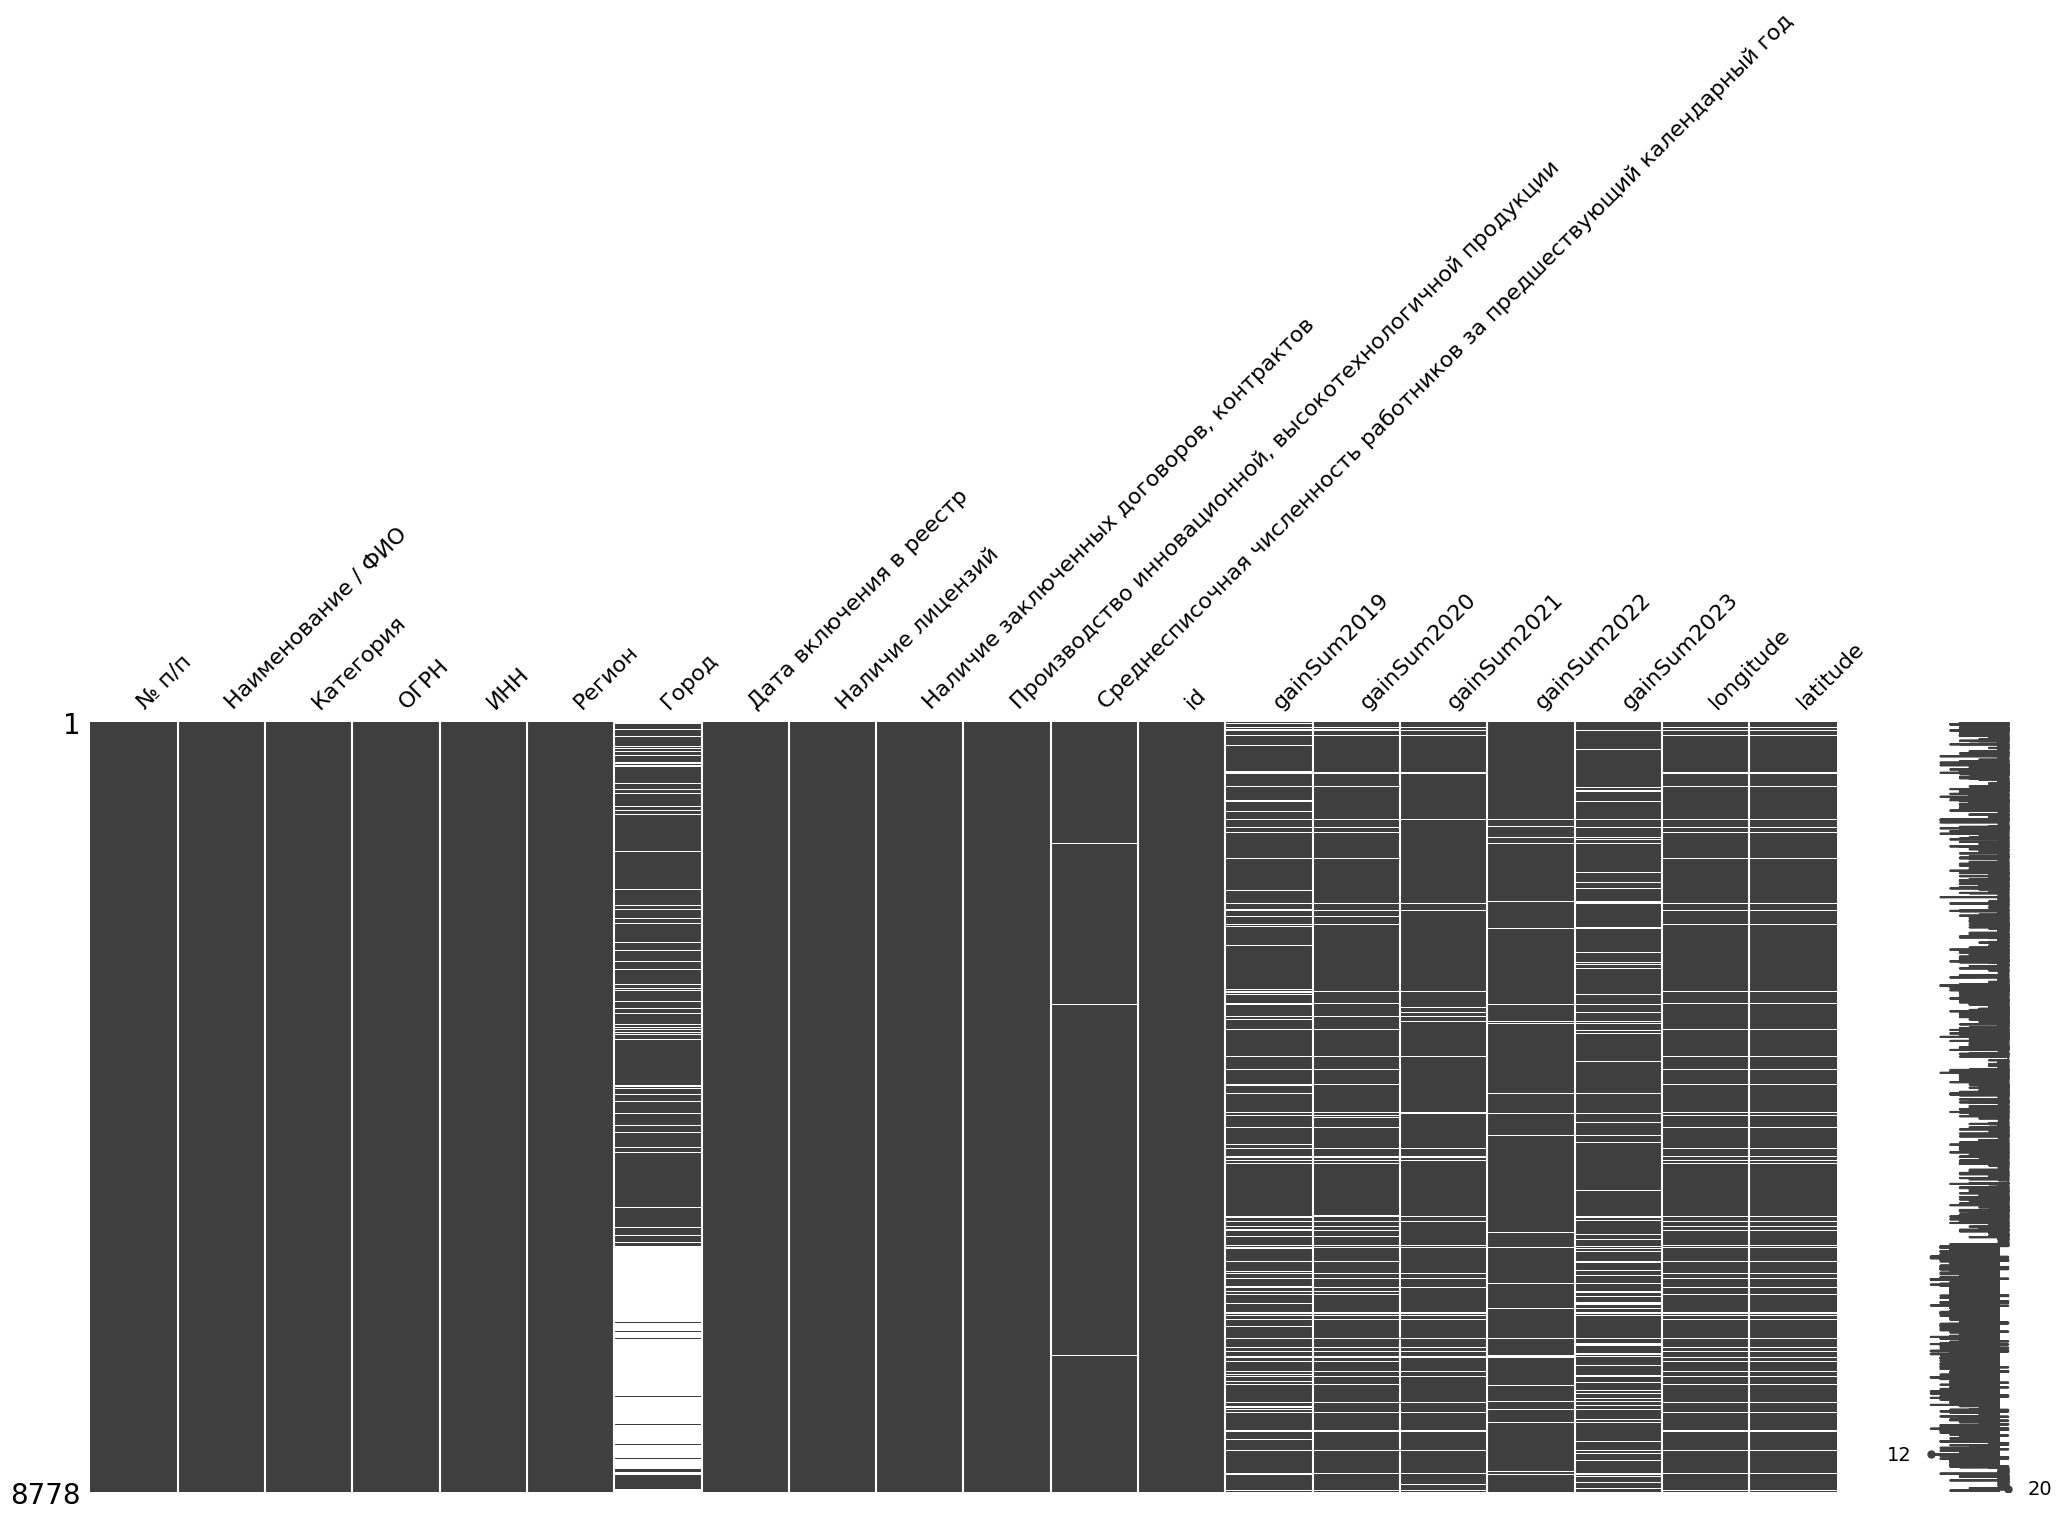

In [68]:
msno.matrix(df4.sort_values(by='Регион',axis=0))

Из этого можно заметить, что даже если отсутствие геолокации оказывается случайным и не сильно зависимым от региона, отсутствие города видимо зависит от региона (это можно видеть после сортировки по региону. Можно увидеть белый пропуск в столбце город.

In [69]:
df4[['gainSum2019', 'gainSum2023']].isnull().corr()

,gainSum2019,gainSum2023
gainSum2019,1.000000,0.163487
gainSum2023,0.163487,1.000000


Уже известно, какова корреляция между недостающими значениями долготы и широты из-за способа их получения.

In [70]:
df4[['Город', 'longitude']].isnull().corr()

,Город,longitude
Город,1.000000,0.109602
longitude,0.109602,1.000000


Корреляция является слабой, но не стоит забыть о том, что это обозначает, что значения редко одновременно отустсвующие. Посмотрим на проценты отсутствующих данных о широте и долготе по региону.

In [71]:
grouper = df4.groupby('Регион')

In [77]:
df_help = grouper[['id', 'latitude']].count()
df_help

,id,latitude
Регион,,
01 - Республика Адыгея (Адыгея),19,18
02 - Республика Башкортостан,246,223
03 - Республика Бурятия,22,22
04 - Республика Алтай,9,9
05 - Республика Дагестан,53,53
...,...,...
87 - Чукотский автономный округ,4,4
89 - Ямало-Ненецкий автономный округ,37,36
91 - Республика Крым,94,93


In [100]:
df_help['percentage'] = df_help['latitude'].div(df_help['id'].replace(0, -1))
df_help[df_help['percentage']<0.85]

,id,latitude,percentage
Регион,,,
08 - Республика Калмыкия,9,6,0.666667
46 - Курская область,30,25,0.833333


Это единственные два региона, в которых меньше 85% значений присутствует.

In [104]:
df_help.describe()

,id,latitude,percentage
count,86.000000,86.000000,86.000000
mean,102.069767,94.837209,0.954678
std,215.223921,188.157435,0.049149
min,1.000000,1.000000,0.666667
25%,25.250000,22.750000,0.933491
50%,53.500000,51.000000,0.961538
75%,93.750000,91.750000,0.997340
max,1833.000000,1578.000000,1.000000


Как видно, этих 9 и 30 значений вообще немного, сравнивая с количеством данных которые есть в других группах. То есть, несложно представить себе, что немного большее отклонение в количестве неизвестных значений не аномалия, а последствие нормального распределения: более великие релативные отклонения происходят проще, когда значений меньше. Буду считать, что отклонения случайны. 

In [108]:
df_biggest_gain_2023 = df4[df4['longitude'].notnull()].nlargest(500, 'gainSum2023')
df_biggest_gain_2023

,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Регион,Город,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год,id,gainSum2019,gainSum2020,gainSum2021,gainSum2022,gainSum2023,longitude,latitude
7964,437176,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СТРО...",Малое предприятие,1177746071227,7708309350,20 - Чеченская Республика,NaN,2017-10-02,Нет,Нет,Нет,43.0,10082903,26026.0,21176.0,13712.0,11857538.0,11931988.0,37.605785,55.659355
4303,304297,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ОБЪЕ...",Среднее предприятие,1167746557087,9717029923,77 - г.Москва,NaN,2023-10-07,Нет,Нет,Нет,27.0,9791942,1892907.0,1900763.0,4920372.0,1146822.0,7960613.0,37.80283,55.70925
9939,512987,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ПРОИЗ...,Среднее предприятие,1027739163066,7730032150,77 - г.Москва,NaN,2016-01-08,Да,Нет,Нет,NaN,7144909,NaN,NaN,NaN,848130.0,6079785.0,37.480793,55.739307
6521,390430,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СПЕЦ...",Малое предприятие,1137325006477,7325124442,34 - Волгоградская область,г Волгоград,2016-01-08,Нет,Нет,Нет,20.0,8149535,NaN,NaN,132549.0,247997.0,5443642.0,44.432205,48.654827
8601,461715,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ТЕХН...",Среднее предприятие,1117604017761,7604214008,76 - Ярославская область,г Ярославль,2016-01-08,Да,Нет,Нет,177.0,164020,676264.0,507452.0,601036.0,956561.0,5047402.0,39.86856,57.62693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,5653,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ТЕЛЕКОМСТРОЙ""",Малое предприятие,1027700454935,7704027964,50 - Московская область,NaN,2017-10-08,Да,Нет,Нет,87.0,6681722,177234.0,301452.0,128811.0,838762.0,1027192.0,38.988125,55.820213
9818,510533,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ИНВЕС...,Малое предприятие,1022402134094,2463059894,24 - Красноярский край,г Красноярск,2016-01-08,Да,Нет,Нет,54.0,5452781,527719.0,733213.0,630316.0,833226.0,1026924.0,92.81054,56.014946
4038,293191,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""МС-Г...",Малое предприятие,1116623000724,6623075622,66 - Свердловская область,г Нижний Тагил,2016-01-08,Да,Нет,Нет,160.0,2667051,344058.0,353539.0,355853.0,635941.0,1026071.0,59.94547,57.908978
5857,369978,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СИТИ...",Малое предприятие,1137746769984,7703795723,77 - г.Москва,NaN,2016-01-08,Да,Нет,Нет,27.0,8044480,43675.0,10610.0,291439.0,1041186.0,1022961.0,37.553185,55.7601


In [111]:
df4.to_csv('geodata.csv')